# NN model for predicting cryptocurrency's price

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [3]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [5]:
prediction_days = 60
future_days = 30

In [6]:
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)-future_days):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x:x+future_days, 0])

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))

In [22]:
try:    
    from tensorflow import keras
    model = keras.models.load_model('./modelsave/model1/')
except:
    print('loading model has been unsuccesful, you can start training model (in .py it will start automaticly)')
    model = Sequential()

    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=200, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=150, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=future_days))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=25, batch_size=32)

    model.save('./modelsave/model1')

loading model has been unsuccesful, you can start training model (in .py it will start automaticly)
Epoch 1/25
69/69 [==============================] - 36s 344ms/step - loss: 0.0259
Epoch 2/25
69/69 [==============================] - 25s 355ms/step - loss: 0.0100
Epoch 3/25
69/69 [==============================] - 26s 377ms/step - loss: 0.0086
Epoch 4/25
69/69 [==============================] - 26s 372ms/step - loss: 0.0065
Epoch 5/25
69/69 [==============================] - 26s 372ms/step - loss: 0.0063
Epoch 6/25
69/69 [==============================] - 26s 372ms/step - loss: 0.0056
Epoch 7/25
69/69 [==============================] - 26s 376ms/step - loss: 0.0049
Epoch 8/25
69/69 [==============================] - 26s 370ms/step - loss: 0.0050
Epoch 9/25
69/69 [==============================] - 26s 371ms/step - loss: 0.0045
Epoch 10/25
69/69 [==============================] - 27s 392ms/step - loss: 0.0045
Epoch 11/25
69/69 [==============================] - 26s 372ms/step - loss: 0.0

INFO:tensorflow:Assets written to: ./modelsave/model1\assets


INFO:tensorflow:Assets written to: ./modelsave/model1\assets


# testing

In [23]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)

np_test_data = np.array(test_data['Close'].values.reshape(-1,1))
scaled_test_data = scaler.fit_transform(test_data['Close'].values.reshape(-1,1))

In [24]:
x_test, y_test = [], []

for x in range(prediction_days, len(scaled_test_data)-future_days):
    x_test.append(scaled_test_data[x-prediction_days:x, 0])
    y_test.append(np_test_data[x-future_days:x, 0])

In [25]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [26]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
prediction = model.predict(x_test)
prediction_price = scaler.inverse_transform(prediction)

score = abs(prediction_price-y_test)

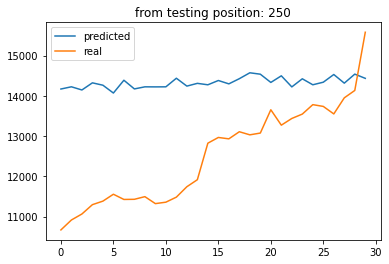

In [28]:
n_day = 250
plt.plot(prediction_price[n_day],label='predicted')
plt.plot(y_test[n_day], label='real')
plt.title('from testing position: '+str(n_day))
plt.legend()
plt.show()

Spearmans correlation: 0.585


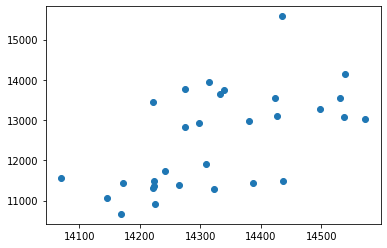

In [29]:
plt.scatter(prediction_price[n_day], y_test[n_day])
from scipy.stats import spearmanr
corr, _ = spearmanr(prediction_price[n_day], y_test[n_day])
print('Spearmans correlation: %.3f' % corr)

In [30]:
correlation = []
for i in range(prediction_price.shape[0]):
    corr, _ = spearmanr(prediction_price[i], y_test[i])
    correlation.append(corr)

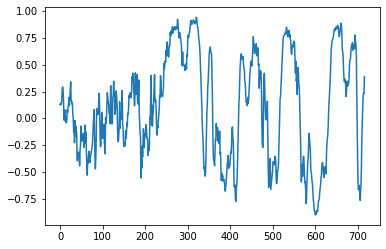

In [31]:
plt.plot(correlation)

In [32]:
np.mean(correlation)

0.11073197407423518

(array([20., 52., 75., 84., 86., 96., 79., 59., 78., 87.]),
 array([-0.89944383, -0.71515017, -0.53085651, -0.34656285, -0.16226919,
         0.02202447,  0.20631813,  0.39061179,  0.57490545,  0.75919911,
         0.94349277]),
 <BarContainer object of 10 artists>)

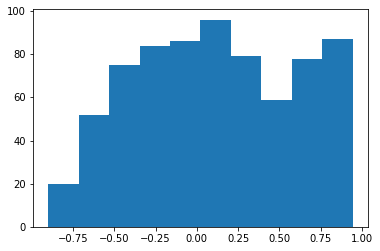

In [33]:
plt.hist(correlation)